In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.filters as flt
import matplotlib as mpl
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
import scipy.stats as stats
%matplotlib inline


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'png')
plt.style.use('default')
mpl.rcParams['figure.dpi'] = 150

# Class unbalance

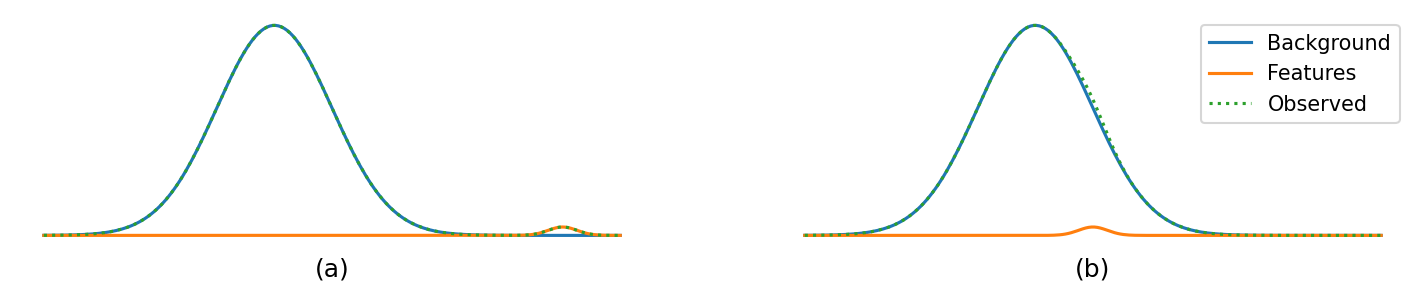

In [9]:
fig,ax = plt.subplots(1,2,figsize=(12,2))
x=np.linspace(0,20,200)
ax[0].plot(x,stats.norm.pdf(x, 8, 2),label='Background'); 
ax[0].plot(x,0.01*stats.norm.pdf(x, 18, 0.5),label='Feature'); 
ax[0].plot(x,stats.norm.pdf(x, 8, 2) + 0.01*stats.norm.pdf(x, 18, 0.5),':', label='Observed' ); 
ax[0].text(0.5, -0.1, '(a)', transform=ax[0].transAxes, fontsize=12, ha='center',va='center')  
ax[0].axis('off')
ax[1].plot(x,stats.norm.pdf(x, 8, 2),label='Background'); 
ax[1].plot(x,0.01*stats.norm.pdf(x, 10, 0.5),label='Features'); 
ax[1].plot(x,stats.norm.pdf(x, 8, 2) + 0.01*stats.norm.pdf(x, 10, 0.5),':', label='Observed' ); 
ax[1].axis('off')
ax[1].text(0.5, -0.1, '(b)', transform=ax[1].transAxes, fontsize=12, ha='center',va='center')  
ax[1].legend() ;
plt.savefig('../lecture/figures/classunbalance.svg')
plt.savefig('../lecture/figures/classunbalance.pdf')

In [10]:
print(x.shape)
print(x.reshape((10,20)).shape)

(200,)
(10, 20)


# Spot images

In [11]:
img=plt.imread('../data/spots/mixture12_00001.png')

In [12]:
img.shape

(2048, 2048, 4)

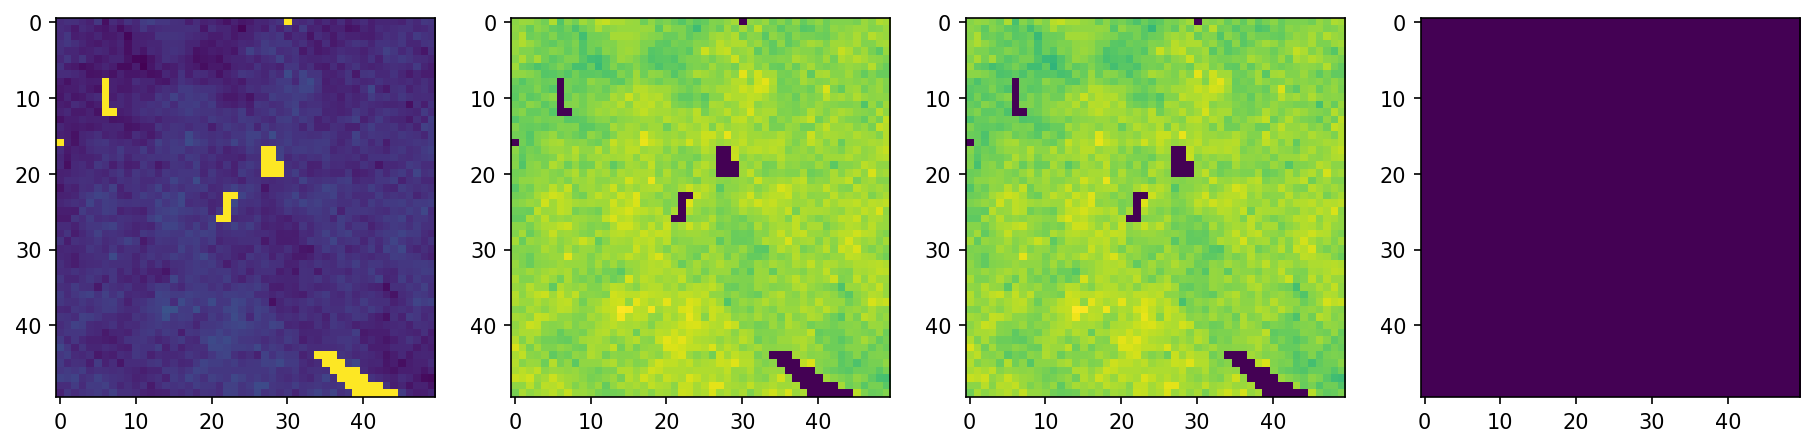

In [34]:
fig, ax = plt.subplots(1,4,figsize=(15,5))

for i in range(4) :
    #ax[i].imshow(img[0:50,0:50,i])
    ax[i].imshow(img[100:150,100:150,i])

In [32]:
img[:,:,0].min()

0.039215688

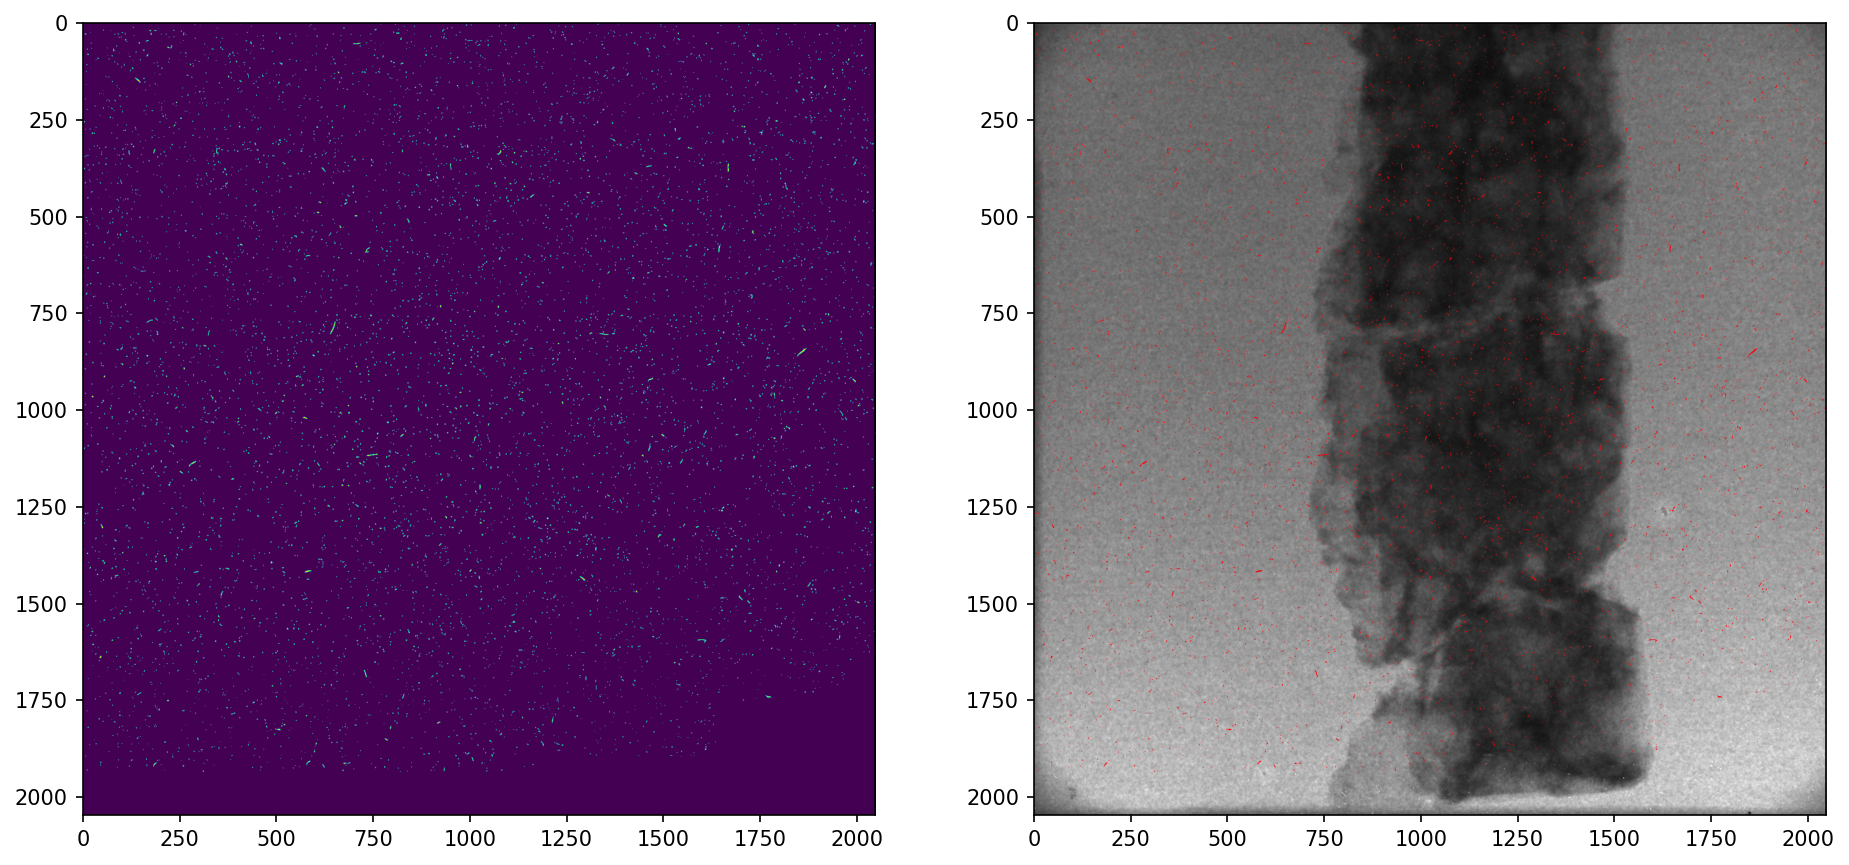

In [54]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

m = 0.8<(img[:,:,0]*(1-img[:,:,1])*(1-img[:,:,2]))
ax[0].imshow(m)
ax[1].imshow(img)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

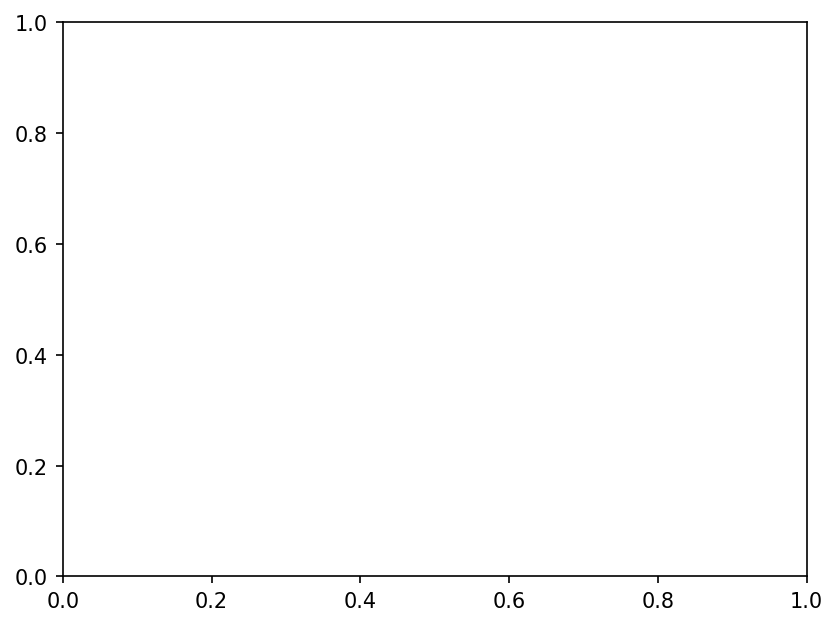